# Sherif Ahmed Naiem

## Task 6 -Prediction using Decision Tree Algorithm

### Reading The Iris Dataset  

In [395]:
from sklearn import datasets

iris = datasets.load_iris()
type(iris)

sklearn.utils.Bunch

In [396]:
print(iris.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [397]:
type(iris.data), type(iris.target)

(numpy.ndarray, numpy.ndarray)

In [398]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

### Exploratory data analysis (EDA)

In [399]:
import pandas as pd

features_array = iris.data
target_array = iris.target

df_iris = pd.DataFrame(features_array, columns=iris.feature_names)
display(df_iris.head())

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [400]:
df_iris.shape

(150, 4)

In [401]:
df_iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [402]:
df_iris.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### Visual EDA

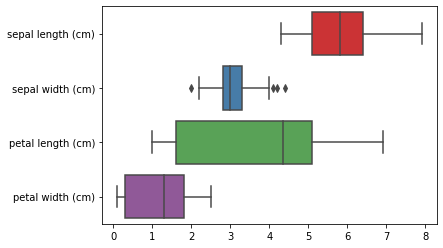

In [403]:
import seaborn as sns

# Visual Representation of the boxplot
ax = sns.boxplot(data=df_iris, orient="h", palette="Set1")

# Show the plot
plt.show()

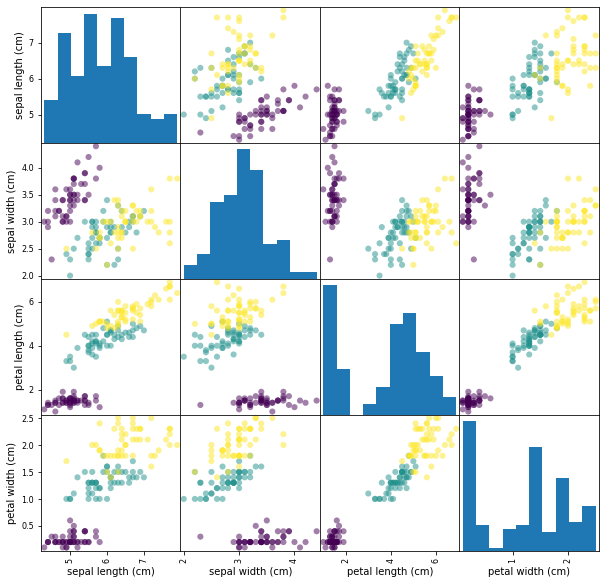

In [404]:
# Visual Representation of the Scatter Matrix
_ = pd.plotting.scatter_matrix(df_iris, c = target_array, figsize = [10, 10],s=150)

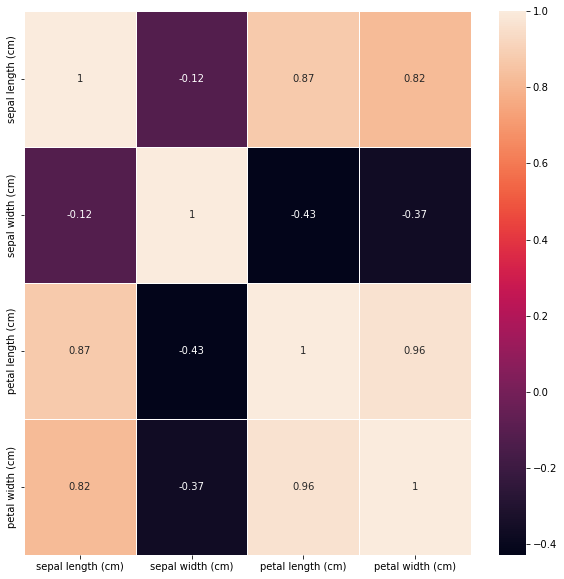

In [405]:
import seaborn as sn

# Visual Representation of the Correlation Matrix using Seaborn and Matplotlib
df_iris_corr = df_iris.corr()

# Sample figsize in inches
fig, ax = plt.subplots(figsize=(10,10)) 

sn.heatmap(df_iris_corr, annot=True, linewidths=.5, ax=ax)
plt.show()

### Splitting The Data Into Trainning And Test Sets

In [406]:
from sklearn.model_selection import StratifiedKFold

# Create StratifiedKFold object.
skf_tempAndtest = StratifiedKFold(n_splits=4, shuffle=True, random_state=7)

for train_index, test_index in skf_tempAndtest.split(features_array, target_array):
    x_train_fold, x_test_fold = features_array[train_index], features_array[test_index]
    y_train_fold, y_test_fold = target_array[train_index], target_array[test_index]

print("Train data size:",(len(x_train_fold)/(len(x_train_fold)+len(x_test_fold)))*100,"%")
print("Test data size:",(len(x_test_fold)/(len(x_train_fold)+len(x_test_fold)))*100,"%")

Train data size: 75.33333333333333 %
Test data size: 24.666666666666668 %


In [407]:
print("y_train_fold: {}".format(y_train_fold))
print("y_test_fold: {}".format(y_test_fold))

y_train_fold: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
y_test_fold: [0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2]


### Decision Tree Classifier Instantiation

In [408]:
from sklearn.tree import DecisionTreeClassifier

# Instantiate a Decision Tree classifier: dt
dt = DecisionTreeClassifier(random_state = 17)

# Print Decision Trees hyperparameters
print(dt.get_params())

{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 17, 'splitter': 'best'}


### Hyperparameter Tuning Using GridSearchCV 

In [409]:
# Setup the parameters and distributions to sample from: params_dt
params_dt = {"max_depth": [3, 4, 5, 6, 7, 8],
             "max_features": [0.4,0.5,0.6,0.7,0.8],
             "criterion": ["gini", "entropy"]}

In [410]:
from sklearn.model_selection import GridSearchCV

# Instantiate the GridSearchCV object: Grid_dt
Grid_dt = GridSearchCV(estimator = dt , param_grid = params_dt , cv = 10 , n_jobs = -1)

# Fit it to the training data
Grid_dt.fit(x_train_fold,y_train_fold)

# Print the optimal parameters and best score
print("Tuned Decision Tree Parameter: {}".format(Grid_dt.best_params_))
print("Tuned Decision Tree Accuracy: {}".format(Grid_dt.best_score_))

# Report the train accuracy using these best parameters
print("Train accuracy of best grid search hypers:", Grid_dt.score(x_train_fold,y_train_fold))

# Report the test accuracy using these best parameters
print("Test accuracy of best grid search hypers:", Grid_dt.score(x_test_fold,y_test_fold))

Tuned Decision Tree Parameter: {'criterion': 'gini', 'max_depth': 7, 'max_features': 0.5}
Tuned Decision Tree Accuracy: 0.9454545454545455
Train accuracy of best grid search hypers: 1.0
Test accuracy of best grid search hypers: 1.0


### Decision Tree Classifier Fitting Then Predictions

In [411]:
# Extract the best model from Grid_dt
Grid_dt_best_model = Grid_dt.best_estimator_

# Fit 'Grid_dt_best_model' to the training set
Grid_dt_best_model.fit(x_train_fold , y_train_fold)

# Predict the labels of the train data: y_pred_train_Grid_dt
y_pred_train_Grid_dt = Grid_dt_best_model.predict(x_train_fold)

# Predict the labels of the test data: y_pred_test_Grid_dt
y_pred_test_Grid_dt = Grid_dt_best_model.predict(x_test_fold)

### Model Evaluation With Cross-Validation

In [412]:
# Evaluate the list of MSE ontained by 10-fold CV
# Set n_jobs to -1 in order to exploit all CPU cores in computation
MSE_CV = - cross_val_score(dt, x_train_fold, y_train_fold, cv= 10,scoring='neg_mean_squared_error',n_jobs = -1)

In [413]:
from sklearn.metrics import mean_squared_error as MSE

# CV MSE
print('CV MSE: {:.2f}'.format(MSE_CV.mean()))

# Training set MSE
print('Train MSE: {:.2f}'.format(MSE(y_train_fold, y_pred_train_Grid_dt)))

# Test set MSE
print('Test MSE: {:.2f}'.format(MSE(y_test_fold, y_pred_test_Grid_dt)))

CV MSE: 0.09
Train MSE: 0.00
Test MSE: 0.00


### Visualizing Decision Tree

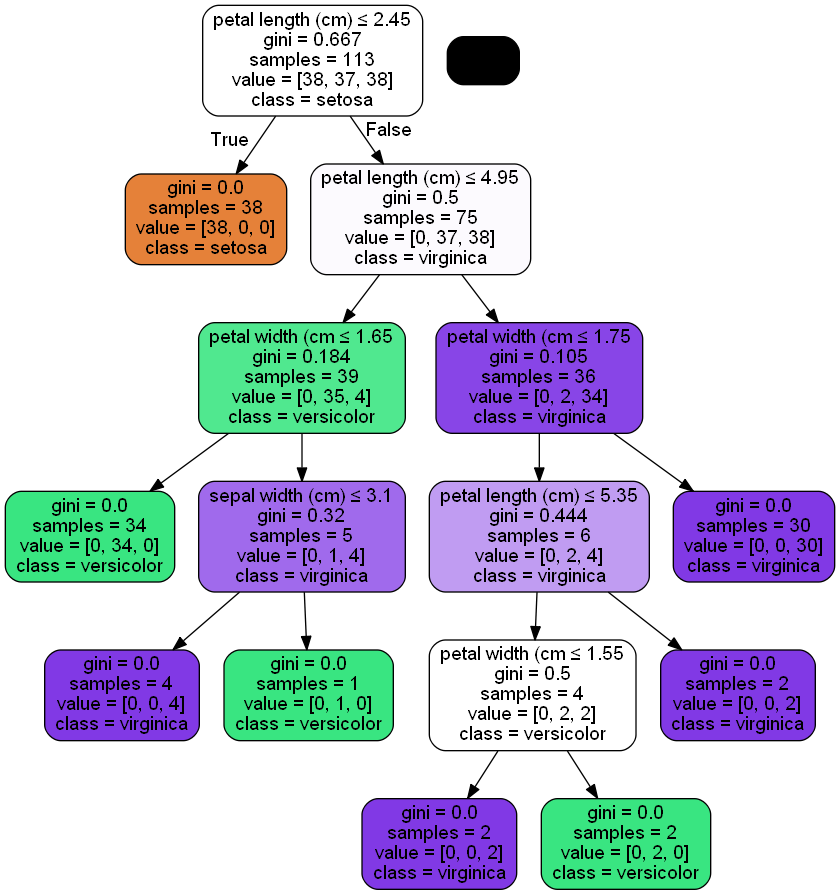

In [414]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus

# Graphiz converts decision tree classfier into dot file
# Pydotplus convert this dot file to png or displayable form on Jupyter

features = ["sepal length (cm)","sepal width (cm)","petal length (cm)","petal width (cm"] 
classes = ["setosa","versicolor","virginica"]

dot_data = StringIO()
export_graphviz(Grid_dt_best_model, out_file = dot_data, rounded = True, filled = True, special_characters = True, 
                feature_names = features, class_names = classes)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png("iris_dt.png")
Image(graph.create_png())

### Confusion Matrix And Classification Report  

In [415]:
print("y_test_fold: {}".format(y_test_fold))
print("y_pred_test_Grid_dt: {}".format(y_pred_test_Grid_dt))

y_test_fold: [0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2]
y_pred_test_Grid_dt: [0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2]


In [416]:
from sklearn.metrics import confusion_matrix

# Generate the confusion matrix 
cm_Grid_dt = confusion_matrix(y_test_fold, y_pred_test_Grid_dt)

print(cm_Grid_dt)

[[12  0  0]
 [ 0 13  0]
 [ 0  0 12]]


In [417]:
from sklearn.metrics import classification_report

# Generate the classification report
cr_Grid_dt = classification_report(y_test_fold, y_pred_test_Grid_dt)

print(cr_Grid_dt)

# Print out count of binary predictions
print(pd.Series(y_pred_Grid_dt).value_counts())

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        12

    accuracy                           1.00        37
   macro avg       1.00      1.00      1.00        37
weighted avg       1.00      1.00      1.00        37

1    13
0    12
2    12
dtype: int64


### Plot ROC Curves

In [418]:
from sklearn import preprocessing
lb = preprocessing.LabelBinarizer()

y_test_fold_binarize = lb.fit_transform(y_test_fold)
y_pred_test_Grid_dt_binarize = lb.fit_transform(y_pred_test_Grid_dt)

n_classes = y_test_fold_binarize.shape[1]
print("Number of classes are {}".format(n_classes))

Number of classes are 3


In [419]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_fold_binarize[:, i], y_pred_test_Grid_dt_binarize[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_fold_binarize.ravel(), y_pred_test_Grid_dt_binarize.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

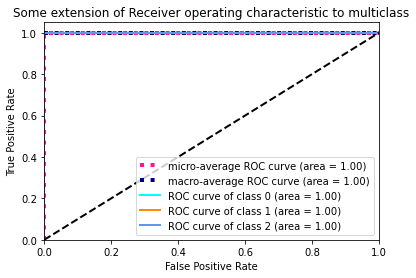

In [420]:
lw = 2

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(
    fpr["micro"],
    tpr["micro"],
    label="micro-average ROC curve (area = {0:0.2f})".format(roc_auc["micro"]),
    color="deeppink",
    linestyle=":",
    linewidth=4,
)

plt.plot(
    fpr["macro"],
    tpr["macro"],
    label="macro-average ROC curve (area = {0:0.2f})".format(roc_auc["macro"]),
    color="navy",
    linestyle=":",
    linewidth=4,
)

colors = cycle(["aqua", "darkorange", "cornflowerblue"])
for i, color in zip(range(n_classes), colors):
    plt.plot(
        fpr[i],
        tpr[i],
        color=color,
        lw=lw,
        label="ROC curve of class {0} (area = {1:0.2f})".format(i, roc_auc[i]),
    )

plt.plot([0, 1], [0, 1], "k--", lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Some extension of Receiver operating characteristic to multiclass")
plt.legend(loc="lower right")
plt.show()

### Area Under ROC

In [421]:
y_prob = Grid_dt_best_model.predict_proba(x_test_fold)

macro_roc_auc_ovo = roc_auc_score(y_test_fold, y_prob, multi_class="ovo", average="macro")
weighted_roc_auc_ovo = roc_auc_score(
    y_test_fold, y_prob, multi_class="ovo", average="weighted"
)
macro_roc_auc_ovr = roc_auc_score(y_test_fold, y_prob, multi_class="ovr", average="macro")
weighted_roc_auc_ovr = roc_auc_score(
    y_test_fold, y_prob, multi_class="ovr", average="weighted"
)
print(
    "One-vs-One ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
    "(weighted by prevalence)".format(macro_roc_auc_ovo, weighted_roc_auc_ovo)
)
print(
    "One-vs-Rest ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
    "(weighted by prevalence)".format(macro_roc_auc_ovr, weighted_roc_auc_ovr)
)

One-vs-One ROC AUC scores:
1.000000 (macro),
1.000000 (weighted by prevalence)
One-vs-Rest ROC AUC scores:
1.000000 (macro),
1.000000 (weighted by prevalence)
